<a href="https://colab.research.google.com/github/walkerjian/Physics/blob/main/SpiderDiffracton1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

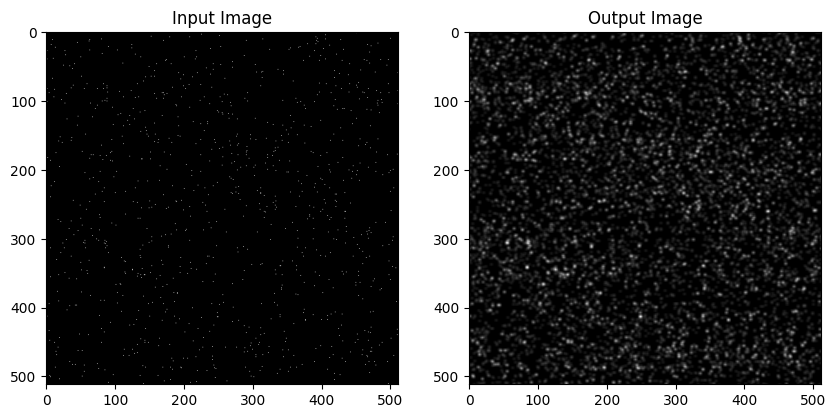

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to calculate the diffraction pattern
def diffraction_pattern(num_vanes, image_size):
    # Initialize the wavefront
    wavefront = np.ones(image_size)

    # Define the radius of the aperture, the secondary, and the vane thickness
    radius = image_size[0] // 2
    secondary_radius = int(0.2 * radius)
    vane_thickness = int(0.01 * radius)

    # Define the vane geometry
    vane_geometry = [(int(radius + radius * np.cos(theta)), int(radius + radius * np.sin(theta))) for theta in np.linspace(0, 2*np.pi, num_vanes, endpoint=False)]

    # For each vane, calculate the diffraction pattern
    for vane in vane_geometry:
        wavefront[vane[0]-vane_thickness:vane[0]+vane_thickness, vane[1]-vane_thickness:vane[1]+vane_thickness] = 0

    # Calculate the far-field diffraction pattern using Fourier transform
    diffraction_pattern = np.abs(np.fft.fft2(wavefront))**2

    return diffraction_pattern

# Define the function to generate a synthetic star field image
def create_synthetic_image(image_size, num_stars):
    # Initialize the image
    image = np.zeros(image_size)

    # Generate random star positions
    star_positions = [tuple(pos) for pos in np.random.randint(0, image_size[0], size=(num_stars, 2))]

    # Set the star positions to white
    for star in star_positions:
        image[star] = 1

    return image

# Define the number of vanes
num_vanes = 3

# Define the image size
image_size = (512, 512)

# Calculate the diffraction pattern
diffraction_pattern = diffraction_pattern(num_vanes, image_size)

# Create a synthetic star field image
image = create_synthetic_image(image_size, 1000)

# Apply the diffraction pattern to the image
convolved_image = np.fft.ifft2(np.fft.fft2(image) * diffraction_pattern).real

# Display the resulting images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Input Image')
axs[1].imshow(convolved_image, cmap='gray')
axs[1].set_title('Output Image')
plt.show()
